In [127]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [111]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [112]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


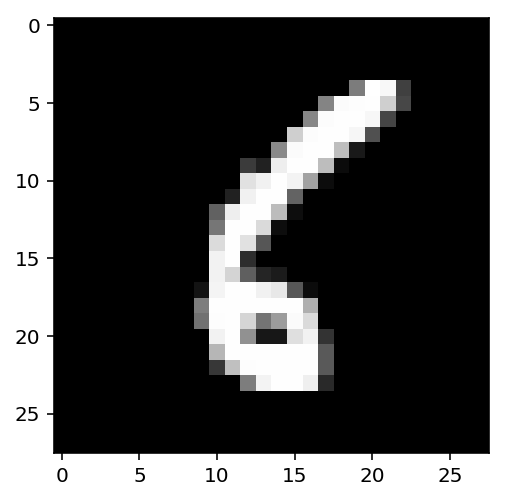

In [113]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [114]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out.shape)
print(out)

torch.Size([64, 10])
tensor([[ 3.4532e+00, -5.7662e+00,  6.6726e+00, -2.0199e+01,  1.2276e+01,
          2.1039e+01, -1.5092e-01,  1.0667e+01,  3.1264e+00,  8.8985e+00],
        [ 2.7716e+00, -8.8298e+00,  1.1370e+01, -7.6498e+00,  1.1398e+01,
          1.1779e+01,  1.4780e+00,  1.4227e+01,  8.3929e+00, -4.4096e-01],
        [ 1.1346e+01, -1.1230e+01,  7.2485e+00, -6.6231e+00,  2.1946e+01,
          1.2116e+01,  8.5067e+00,  1.8500e+01, -1.1666e+00,  3.8016e+00],
        [ 1.1659e+01, -3.8124e+00,  1.0513e+01, -7.9096e+00,  2.0536e+01,
          1.4808e+01,  7.8873e+00,  1.0086e+01,  1.0774e+01, -9.1171e+00],
        [-1.3455e+00, -1.0864e+01,  9.0245e+00, -1.2444e+01,  8.1923e+00,
          1.5591e+01,  1.0386e+01,  8.5883e+00, -1.2301e+00,  3.5677e-01],
        [ 7.4140e-01, -5.0829e+00,  7.0841e+00, -1.2183e+01,  1.8612e+01,
          1.8180e+01, -2.2019e+00,  1.9588e+01,  2.9346e+00,  2.1396e+00],
        [ 6.0249e+00,  1.3107e+00,  1.1866e+01, -1.4098e+01,  1.4310e+01,
          1

In [115]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [116]:
from torch import nn


In [117]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [118]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [119]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [120]:

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [121]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0263, -0.0158, -0.0054,  ...,  0.0065,  0.0135,  0.0049],
        [-0.0132,  0.0052, -0.0323,  ..., -0.0005,  0.0295,  0.0155],
        [-0.0315, -0.0325, -0.0188,  ..., -0.0165,  0.0061, -0.0332],
        ...,
        [-0.0229, -0.0315, -0.0304,  ..., -0.0328, -0.0261, -0.0145],
        [ 0.0311, -0.0165, -0.0153,  ...,  0.0148,  0.0138, -0.0242],
        [ 0.0044,  0.0355,  0.0199,  ..., -0.0164, -0.0214, -0.0225]],
       requires_grad=True)
Parameter containing:
tensor([ 5.5779e-05,  7.7265e-03,  2.9633e-02, -2.8047e-02, -1.9924e-03,
         1.2994e-02,  2.0609e-02,  3.3053e-02, -2.1102e-02,  2.3522e-02,
         2.6768e-03, -1.7141e-02, -1.1079e-03,  2.0300e-02, -1.8260e-02,
        -1.1255e-02,  1.2852e-02,  9.8328e-03,  1.0639e-02,  3.1149e-02,
         1.7655e-02, -1.6504e-03, -8.9628e-03,  2.8089e-02,  2.5567e-02,
        -1.2363e-02,  9.6922e-03,  2.0427e-02,  2.9302e-02, -3.5499e-02,
        -1.1625e-02,  3.3716e-02, -1.3567e-02, -4.4790e-0

In [122]:
print( model.fc1.weight.data)

tensor([[ 0.0263, -0.0158, -0.0054,  ...,  0.0065,  0.0135,  0.0049],
        [-0.0132,  0.0052, -0.0323,  ..., -0.0005,  0.0295,  0.0155],
        [-0.0315, -0.0325, -0.0188,  ..., -0.0165,  0.0061, -0.0332],
        ...,
        [-0.0229, -0.0315, -0.0304,  ..., -0.0328, -0.0261, -0.0145],
        [ 0.0311, -0.0165, -0.0153,  ...,  0.0148,  0.0138, -0.0242],
        [ 0.0044,  0.0355,  0.0199,  ..., -0.0164, -0.0214, -0.0225]])


In [123]:
model.fc1.bias.data.fill_(0)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [124]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0008,  0.0014,  0.0089,  ...,  0.0090, -0.0094, -0.0001],
        [ 0.0101, -0.0123,  0.0050,  ..., -0.0017, -0.0011,  0.0016],
        [-0.0033,  0.0106,  0.0091,  ..., -0.0150,  0.0079, -0.0004],
        ...,
        [-0.0019, -0.0015, -0.0122,  ..., -0.0046, -0.0055,  0.0027],
        [-0.0001, -0.0085,  0.0068,  ...,  0.0014, -0.0036,  0.0081],
        [-0.0138,  0.0024,  0.0057,  ...,  0.0076,  0.0312,  0.0020]])

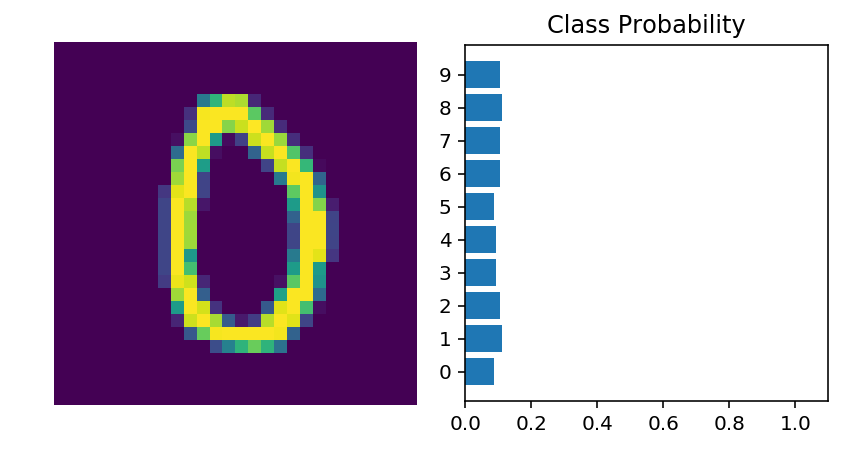

In [125]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)


img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


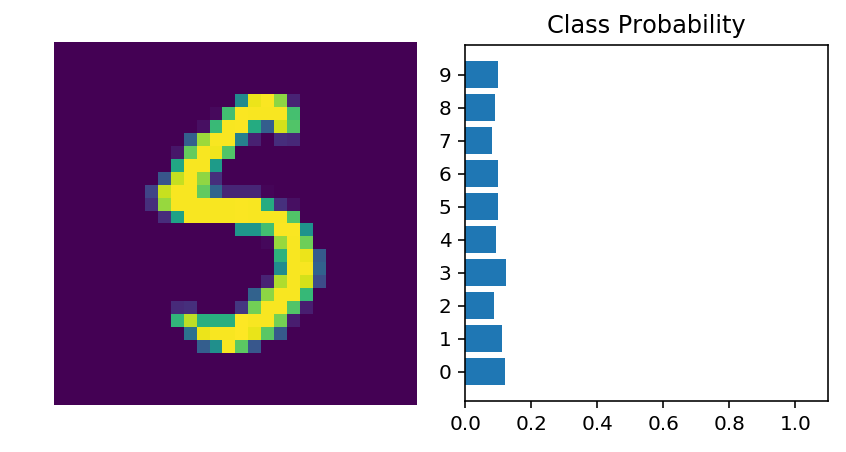

In [128]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [129]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0244, -0.0220, -0.0077,  ..., -0.0235,  0.0143,  0.0178],
        [-0.0283,  0.0219,  0.0278,  ..., -0.0080,  0.0294, -0.0016],
        [ 0.0036, -0.0149, -0.0269,  ..., -0.0234,  0.0062, -0.0144],
        ...,
        [-0.0064, -0.0236,  0.0003,  ..., -0.0306, -0.0316, -0.0116],
        [-0.0133,  0.0234,  0.0052,  ..., -0.0111, -0.0138,  0.0291],
        [-0.0141, -0.0352, -0.0116,  ...,  0.0187,  0.0136,  0.0077]],
       requires_grad=True)

In [130]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [131]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
